I first constructed annual CRFs and then calculate the orientation angles between them and ICRF3.

Here I presented the second method, which is that I use the mean positions of source within one-year windows to construct the annual CRF.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

from astropy.table import Table
import astropy.units as u

# My progs
from myprogs.catalog.read_icrf import read_icrf3
from myprogs.StatsFunc.rms_calc import rms_calc
from myprogs.catalog.pos_diff import radio_cat_diff_calc
from tool_func import calc_orient_new

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

In [3]:
years = np.concatenate(([1984], np.arange(1986, 2021)))
# years = np.concatenate((np.arange(1979, 2021)))

num = len(years)

In [4]:
N0 = np.zeros_like(years)
# N1 = np.zeros_like(years)
pmt = np.empty((num, 8), dtype=float)
err = np.empty((num, 8), dtype=float)

In [5]:
N0_d = np.zeros_like(years)
# N1_d = np.zeros_like(years)
pmt_d = np.empty((num, 8), dtype=float)
err_d = np.empty((num, 8), dtype=float)

In [6]:
for i, year in enumerate(years):
    
#     print("\nProcessing time series within {:d}-{:d}".format(year, year+1))
    
    ts_sou = Table.read("../data/yearly-ts-nju-10step/{:d}.dat".format(year), format="ascii")
    
    
    # Add unit information
    ts_sou["ra"].unit = u.deg
    ts_sou["dec"].unit = u.deg
    ts_sou["ra_err"].unit = u.mas
    ts_sou["dec_err"].unit = u.mas
    
    # ICRF3 defining sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3def, sou_name="iers_name")
#     N0_d[i], N1_d[i], pmt_d[i], err_d[i] = calc_orient(pos_oft)
    N0_d[i], pmt_d[i], err_d[i] = calc_orient_new(pos_oft)

    # All sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3sx, sou_name="iers_name")
#     N0[i], N1[i], pmt[i], err[i] = calc_orient(pos_oft)
    N0[i], pmt[i], err[i] = calc_orient_new(pos_oft)

/Users/Neo/scisoft/opt64/lib/python3.9/site-packages/myprogs/catalog/pos_diff.py:275: RuntimeWarning: divide by zero encountered in true_divide
  ratio1 = (eema1 / eena1)**2
/Users/Neo/scisoft/opt64/lib/python3.9/site-packages/myprogs/catalog/pos_err.py:168: RuntimeWarning: invalid value encountered in sqrt
  M, m = np.sqrt(M2), np.sqrt(m2)


# ICRF3 defining sources only

Text(0, 0.5, 'Nb sources')

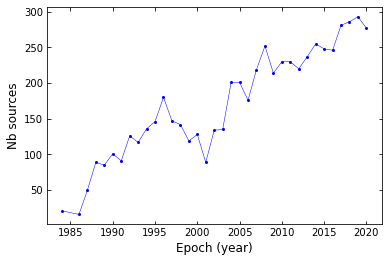

In [7]:
fig, ax = plt.subplots()

ax.plot(years, N0_d, "b-o", ms=2, lw=0.5, label="$N_0$")
# ax.plot(years, N1_d, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Nb sources", fontsize=12)
# ax.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


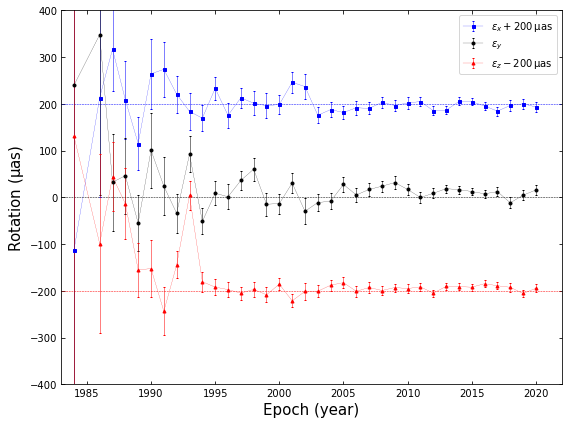

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1979, 2025, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1979, 2025, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1979, 2025, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            # opa2021a
            pmt_d[:, 3] + 200 - 36,
            # nju2021a
#             pmt_d[:, 3] + 200 - 23,
            yerr=err_d[:, 3],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+200\,\mathrm{\mu as}$",
            capsize=1)
ax.errorbar(years,
            # opa2021a
            pmt_d[:, 4] + 52,
            # nju2021a
#             pmt_d[:, 4] + 46,
            yerr=err_d[:, 4],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years,
            # opa2021a
            pmt_d[:, 5] - 200 + 10,
            # nju2021a
#             pmt_d[:, 5] - 200 + 5,
            yerr=err_d[:, 5],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_z-200\,\mathrm{\mu as}$",
            capsize=1)

ax.set_xlabel("Epoch (year)", fontsize=15)
ax.set_ylabel("Rotation ($\mathrm{\mu as}$)", fontsize=15)

ax.axis([1983, 2022, -400, 400])
# plt.title("Rotation from 10-step solution", fontsize=15)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/orient-from-yearly-ts-nju.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


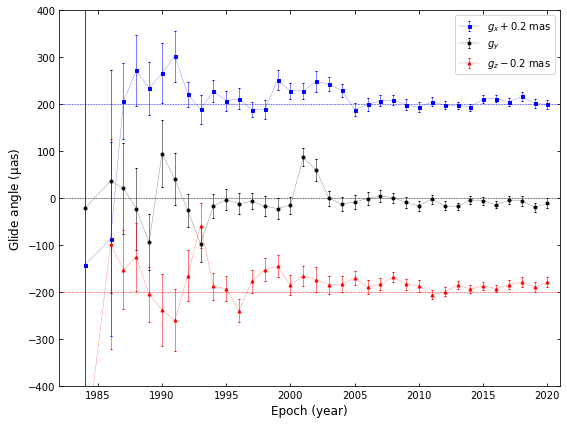

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1979, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1979, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1979, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt_d[:, 0] + 200,
            yerr=err_d[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 1],
            yerr=err_d[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$g_y$",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 2] - 200,
            yerr=err_d[:, 2],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$g_z-0.2$ mas",
            capsize=1)

ax.axis([1982, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/glide-from-yearly-ts-nju.eps")

In [10]:
wx = pmt_d[:, 3]
wy = pmt_d[:, 4]
wz = pmt_d[:, 5]

wx_err = err_d[:, 3]
wy_err = err_d[:, 4]
wz_err = err_d[:, 5]

In [11]:
wmean1, wrms1, wstd1 = rms_calc(wx)
wmean2, wrms2, wstd2 = rms_calc(wy)
wmean3, wrms3, wstd3 = rms_calc(wz)

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


wmean1, wrms1, wstd1 = rms_calc(wx, wx_err)
wmean2, wrms2, wstd2 = rms_calc(wy, wy_err)
wmean3, wrms3, wstd3 = rms_calc(wz, wz_err)

print("\nRotation statistics (Weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1   +32    70  63
R2   -24    78  74
R3   +26    84  79

Rotation statistics (Weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +33  35  13
R2   -41  44  16
R3    -3  17  17


In [12]:
year_start = 1995
mask = (years >= year_start)

In [13]:
wmean1, wrms1, wstd1 = rms_calc(wx[mask])
wmean2, wrms2, wstd2 = rms_calc(wy[mask])
wmean3, wrms3, wstd3 = rms_calc(wz[mask])

print("Rotation statistics (No weighted, Remove data < {:d})".format(year_start))
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(wx[mask], wx_err[mask])
wmean2, wrms2, wstd2 = rms_calc(wy[mask], wy_err[mask])
wmean3, wrms3, wstd3 = rms_calc(wz[mask], wz_err[mask])

print("Rotation statistics (Weighted, Remove data < {:d})".format(year_start))
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


Rotation statistics (No weighted, Remove data < 1995)
    Mean   RMS  Std
    uas    uas  uas
R1   +35    40  17
R2   -42    47  19
R3    -6    11  9
Rotation statistics (Weighted, Remove data < 1995)
    Mean  WRMS Std
    uas   uas  uas
R1   +33  35  11
R2   -41  43  13
R3    -5  9  7


In [14]:
year_start = 2018
mask = (years >= year_start)

In [15]:
wmean1, wrms1, wstd1 = rms_calc(wx[mask])
wmean2, wrms2, wstd2 = rms_calc(wy[mask])
wmean3, wrms3, wstd3 = rms_calc(wz[mask])

print("Rotation statistics (No weighted, Remove data < {:d})".format(year_start))
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(wx[mask], wx_err[mask])
wmean2, wrms2, wstd2 = rms_calc(wy[mask], wy_err[mask])
wmean3, wrms3, wstd3 = rms_calc(wz[mask], wz_err[mask])

print("Rotation statistics (Weighted, Remove data < {:d})".format(year_start))
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


Rotation statistics (No weighted, Remove data < 2018)
    Mean   RMS  Std
    uas    uas  uas
R1   +33    40  3
R2   -49    62  14
R3    -8    12  7
Rotation statistics (Weighted, Remove data < 2018)
    Mean  WRMS Std
    uas   uas  uas
R1   +33  33  3
R2   -49  50  11
R3    -8  10  6


# All sources

Text(0, 0.5, 'No. sources')

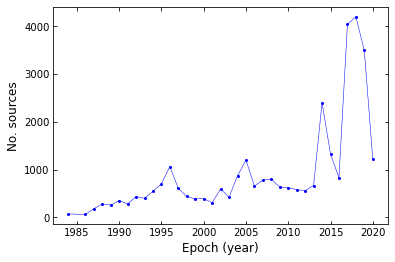

In [16]:
fig, ax = plt.subplots()

ax.plot(years, N0, "b-o", ms=2, lw=0.5, label="$N_0$")
# ax.plot(years, N1, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
# ax.legend()

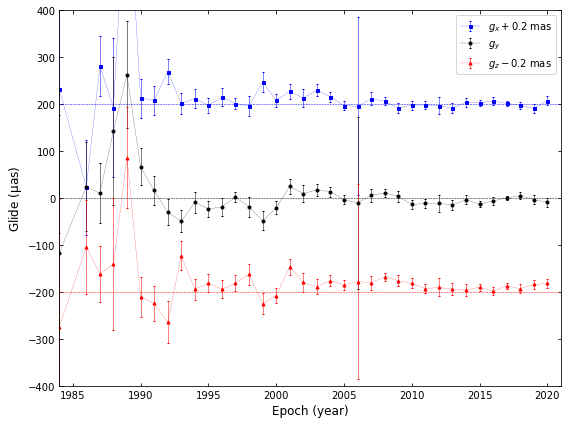

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt[:, 0] + 200,
            yerr=err[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt[:, 1],
            yerr=err[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$g_y$",
            capsize=1)
ax.errorbar(years,
            pmt[:, 2] - 200,
            yerr=err[:, 2],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$g_z-0.2$ mas",
            capsize=1)

ax.axis([1984, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/glide-from-yearly-ts.eps")

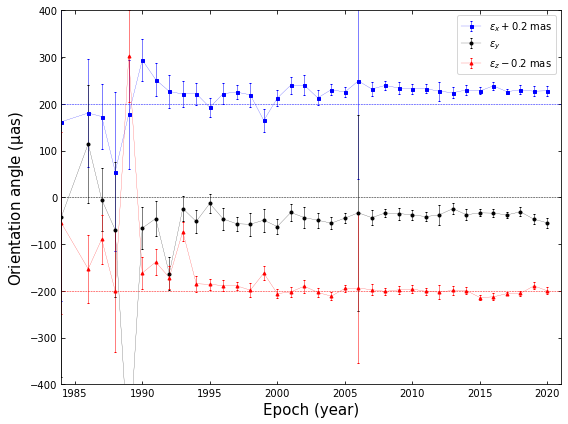

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt[:, 3] + 200,
            yerr=err[:, 3],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt[:, 4],
            yerr=err[:, 4],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years,
            pmt[:, 5] - 200,
            yerr=err[:, 5],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_z-0.2$ mas",
            capsize=1)

ax.axis([1984, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=15)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=15)
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/orient-from-yearly-ts.eps")

In [19]:
wx = pmt[:, 3]
wy = pmt[:, 4]
wz = pmt[:, 5]

wx_err = err[:, 3]
wy_err = err[:, 4]
wz_err = err[:, 5]


In [20]:
wmean1, wrms1, wstd1 = rms_calc(wx)
wmean2, wrms2, wstd2 = rms_calc(wy)
wmean3, wrms3, wstd3 = rms_calc(wz)

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


wmean1, wrms1, wstd1 = rms_calc(wx, wx_err)
wmean2, wrms2, wstd2 = rms_calc(wy, wy_err)
wmean3, wrms3, wstd3 = rms_calc(wz, wz_err)

print("Rotation statistics (Weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1   +17    42  38
R2   -55   109  94
R3   +31    95  89
Rotation statistics (Weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +28  30  11
R2   -40  43  16
R3    +0  16  16
